In [1]:
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#graph section
#import networkx as nx
#import heapq  # for getting top n number of things from list,dict

%matplotlib inline

In [2]:
#loading the dataset
business=pd.read_csv("yelp_business.csv")
reviews=pd.read_csv("yelp_review.csv")


In [3]:
tip = pd.read_csv("yelp_tip.csv")
checking= pd.read_csv("yelp_checkin.csv")

In [4]:
#take a peak
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
# The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.

#from nltk.corpus import stopwords
#business['city'] = [word for word in business['city'] if word not in stopwords.words('english')]
## Remove Punctuation
business['city'] = business['city'].str.replace('[^\w\s]','')
##lower case
business['city']=business['city'].str.lower()
## Remove digits
business['city'] = business['city'].str.replace('\d+', '')


In [6]:
v=business.city.value_counts()
v.head()

las vegas     26810
phoenix       17215
toronto       17211
charlotte      8554
scottsdale     8228
Name: city, dtype: int64

In [7]:
review_city_business = business[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
review_city_business.head(10)

,review_count,stars
city,,
las vegas,1605353,3.710034
phoenix,576726,3.673889
toronto,430985,3.487305
scottsdale,308529,3.948529
charlotte,237118,3.571721
pittsburgh,179471,3.629819
henderson,166884,3.789362
tempe,162772,3.729885
mesa,134156,3.639731


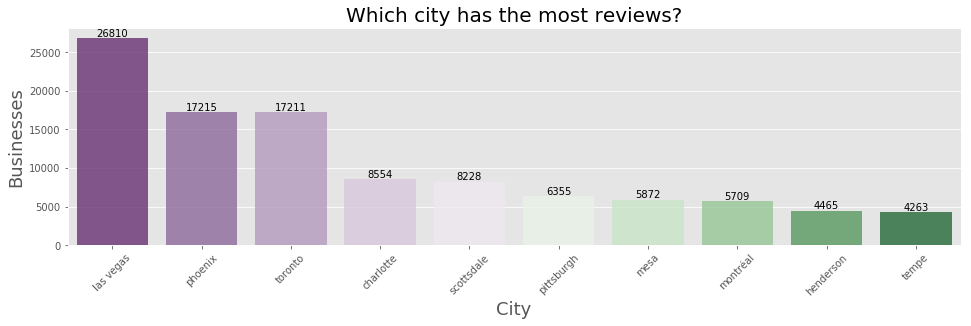

In [8]:
#distribution of the ratings
number=business['city'].value_counts()
number=number.sort_values(ascending=False)
number=number.iloc[0:10]
plt.style.use('ggplot')
plt.figure(figsize=(16,4))
ax = sns.barplot(number.index, number.values, alpha=0.8,palette = 'PRGn')

plt.title("Which city has the most reviews?", fontsize=20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Businesses', fontsize=18)
plt.xlabel('City', fontsize=18)

#adding the text labels
reaction = ax.patches
text_labels = number.values
for i, j in zip(reaction, text_labels):
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

stem() got an unexpected keyword argument 'palette'. This will raise a TypeError in future versions.



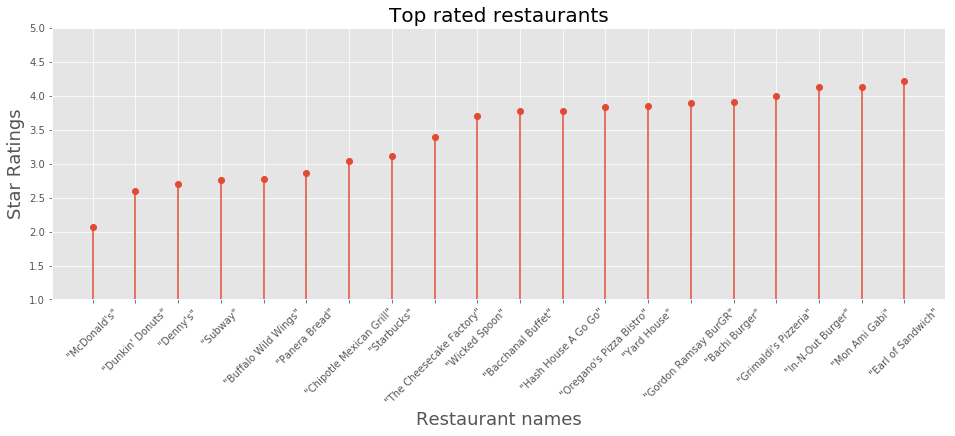

In [17]:
# reviews dataset has business id but don't have businesss name.
# But business dataset has business name and business id.
# So I take the review business_id and match with business dataset business id.
reviews['name'] = reviews['business_id'].map(business.set_index('business_id')['name'])
# take the top only 20 most occurances restaurants for analysis. 
top_rated_restaurants = reviews.name.value_counts().index[:20].tolist()
# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_rated_restaurants'
top_review = reviews.loc[reviews['name'].isin(top_rated_restaurants)]

# then plot the graph
a=top_review.groupby(top_review.name)['stars'].mean().sort_values(ascending=True)
plt.style.use('ggplot')
plt.figure(figsize=(16,5))
plt.stem(a.index, a.values,palette = 'coolwarm')
plt.ylim(1, 5)

plt.xticks(rotation=45)
plt.title('Top rated restaurants',fontsize=20)
plt.xlabel('Restaurant names', fontsize=18)
plt.ylabel('Star Ratings', fontsize=18)
plt.show()



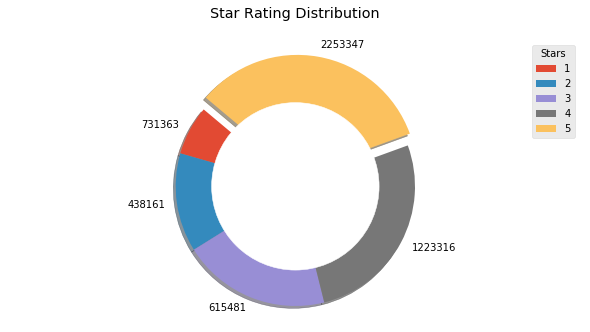

In [10]:
import matplotlib.pyplot as plotter
#Get the distribution of the ratingsfor yelp_review
x=reviews['stars'].value_counts()
x=x.sort_index()
#plot
plt.style.use('ggplot')
plt.figure(figsize=(8,4))

# Data to plot
labels = x.values
sizes=x.index
patches = [1,2,3,4,5]
explode = (0, 0, 0, 0,0.1)  # explode 1st slice
 
# Plot
patches, texts =plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=140)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout(pad=0)
plt.legend(patches, sizes, loc="best", title="Stars")
plt.title("Star Rating Distribution\n")
 
plt.axis('equal')

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [11]:
user_total=reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [12]:
user_total=user_total.sort_values([('review_id','count')],ascending=False)
print("Top 10 Users in Yelp")
user_total.head(10)

Top 10 Users in Yelp


review_id        date             useful  funny   cool  \
                           count         min         max    sum    sum    sum   
user_id                                                                         
CxDOIDnH8gp9KXzpBHJYXw      3569  2009-11-09  2017-12-05  11345   5546   6695   
bLbSNkLggFnqwNNzzq-Ijw      2077  2012-05-20  2017-12-11  23572  12630  16303   
PKEzKWv_FktMm2mGPjwd0Q      1611  2008-12-12  2017-12-05  12078   4987   8183   
DK57YibC5ShBmqQl97CKog      1463  2006-02-12  2017-12-10  13175   6693  10795   
QJI9OSEn6ujRCtrX06vs1w      1322  2007-03-20  2016-05-01   8748   4104   6142   
d_TBs6J3twMy9GChqUEXkg      1184  2010-12-27  2017-11-23   2992   1341   1792   
ELcQDlf69kb-ihJfxZyL0A      1159  2011-04-10  2017-12-10   2155   1298   1029   
cMEtAiW60I5wE_vLfTxoJQ      1126  2009-06-12  2017-12-07   1943   1213   1509   
hWDybu_KvYLSdEFzGrniTw      1117  2009-03-08  2017-11-26   7234   4968   5762   
U4INQZOPSUaj8hMjLlZ3KA      1101  2008-05-13  2017-12-11   6116   2832   4187   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.201737  
bLbSNkLggFnqwNNzzq-Ijw  3.256139  
PKEzKWv_FktMm2mGPjwd0Q  3.664804  
DK57YibC5ShBmqQl97CKog  3.826384  
QJI9OSEn6ujRCtrX06vs1w  3.622542  
d_TBs6J3twMy9GChqUEXkg  3.463682  
ELcQDlf69kb-ihJfxZyL0A  2.993097  
cMEtAiW60I5wE_vLfTxoJQ  4.066607  
hWDybu_KvYLSdEFzGrniTw  3.640107  
U4INQZOPSUaj8hMjLlZ3KA  3.714805

Number of city listed 1040


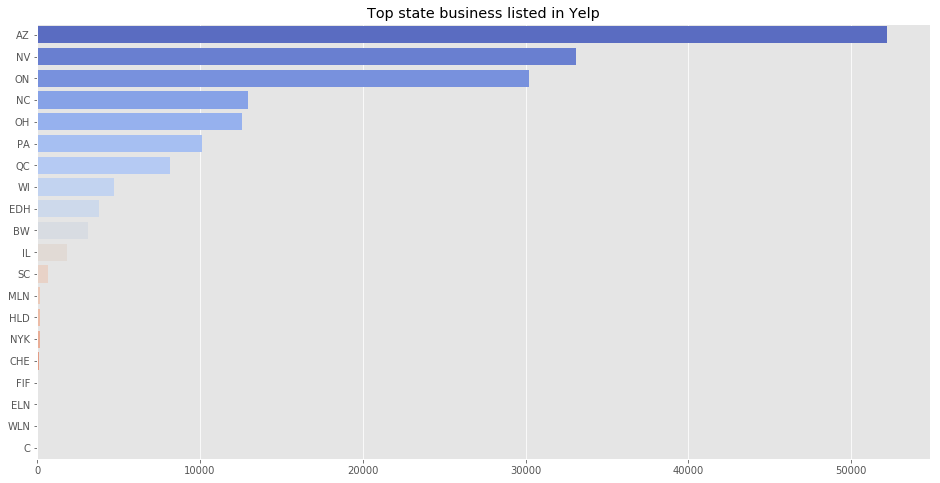

In [13]:
print('Number of city listed',business['city'].nunique())
plt.style.use('ggplot')
f,ax = plt.subplots(1,1, figsize=(16,8))
#ax1,ax2, = ax.flatten()
count_c = business['state'].value_counts()[:20].to_frame()

sns.barplot(count_c['state'], count_c.index, palette = 'coolwarm', ax =ax)
ax.set_xlabel('')
ax.set_title('Top state business listed in Yelp');

Maximum number of category 36
Median category of business 3.0


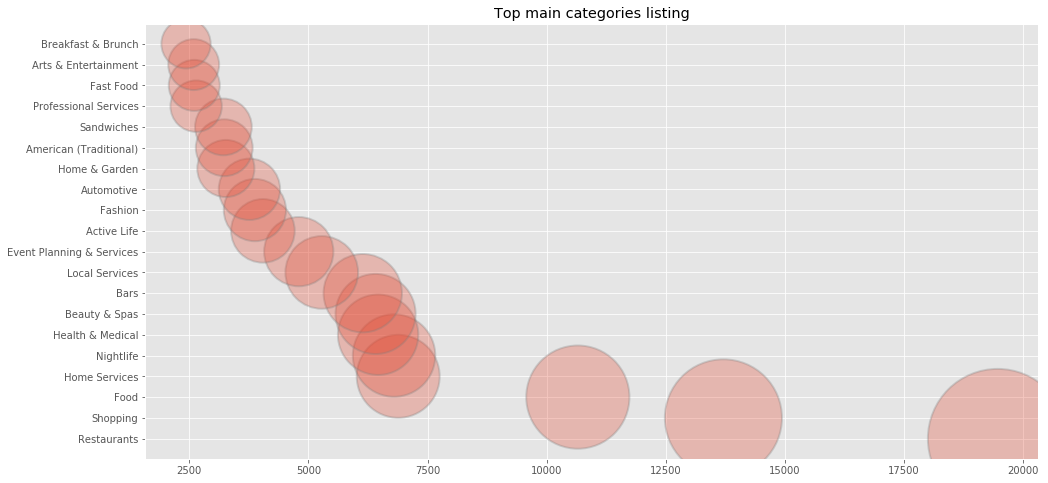

In [14]:
#We find,there are 1093 city listed in yelp.com
#city Las Vegas is top list in business listing in Yelp.com followed by Phoniex,Toronto etc..
#thier are 67 state listed in yelp.com
#state AZ is top in the list of Yelp.com
#There are few states having very few business listing

print('Maximum number of category',business['categories'].str.split(';').str.len().max())
print('Median category of business',business['categories'].str.split(';').str.len().median())
joint = ' '.join(business['categories'])

joint = pd.DataFrame(joint.split(';'),columns=['categories'])
count_s = joint['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(16,8))
plt.style.use('ggplot')
#sns.catplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.scatter(count_s['categories'], count_s.index, cmap="viridis", s=count_s.values, alpha=0.3, edgecolors="grey", linewidth=2)
plt.title('Top main categories listing');


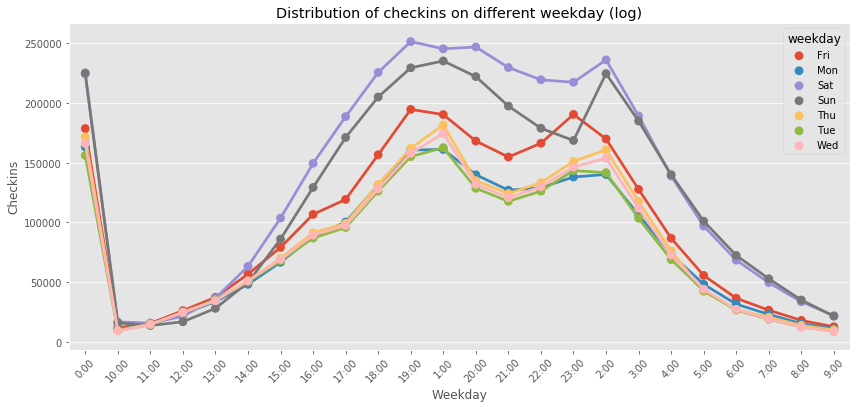

In [15]:
#timing when people visit the places:
k = checking.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.pointplot(y = k['checkins'],x = k['hour'],hue = k['weekday'],alpha=0.3)
plt.ylabel('Checkins')
plt.title('Distribution of checkins on different weekday (log)')
plt.xlabel('Weekday')
plt.xticks(rotation=45);

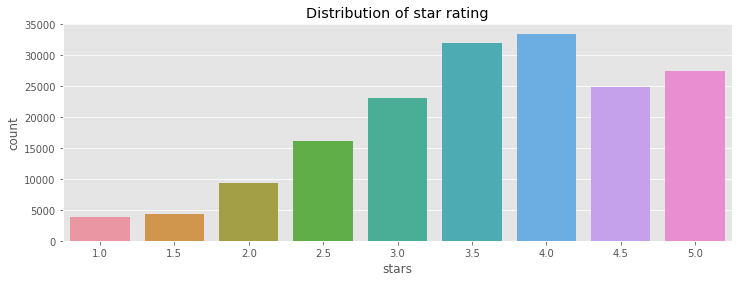

In [16]:
plt.figure(figsize=(12,4))
star = sns.countplot(business['stars'])
plt.style.use('ggplot')
plt.title('Distribution of star rating');

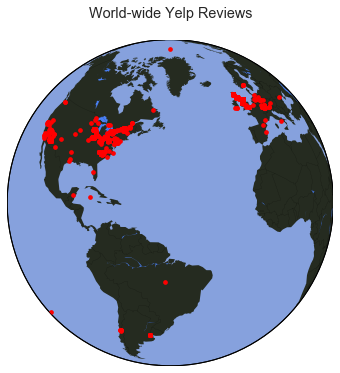

In [54]:
#basic basemap of the world
plt.figure(1, figsize=(16,6))
# use ortho projection for the globe type version
map_1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

#add continents
map_1.fillcontinents(color='#252b20',lake_color='#4a80f5') 
# add the oceans
map_1.drawmapboundary(fill_color='#86a1dd')                
# Draw the boundaries of the countires
map_1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
map_scatter = map_1(business["longitude"].tolist(), business["latitude"].tolist())
map_1.scatter(map_scatter[0], map_scatter[1], s=3, c="red", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews\n",ha='center', va='center')
plt.show()